In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import importlib
import matplotlib.pyplot as plt
import polars as pl
import sys
sys.path.append("../../")

from astroLuSt.database_interface import tesscut_interface as aldate


importlib.reload(aldate)

# %matplotlib qt
# %matplotlib inline

2024-11-06 11:40:58.534638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<module 'astroLuSt.database_interface.tesscut_interface' from '/home/lukas/github/astroLuSt/demos/database_interface/../../astroLuSt/database_interface/tesscut_interface.py'>

In [ ]:
#define targets
transients = [
    dict(coords=SkyCoord(327.16008333,-43.38001944, unit=u.deg), name="2018evo", sectors=[1],  period=1e8),
    # dict(coords=SkyCoord(315.03341667,-40.35859444, unit=u.deg), name="2018exc", sectors=[1],  period=1e8),
    # dict(coords=SkyCoord(313.47458333,-38.01559444, unit=u.deg), name="2018fgb", sectors=[1],  period=1e8),
    dict(coords=SkyCoord(342.82569167,-38.87439722, unit=u.deg), name="2018exg", sectors=[1],  period=1e8),
    dict(coords=SkyCoord(332.648,     -27.25016111, unit=u.deg), name="2018emt", sectors=[1],  period=1e8),
    dict(coords=SkyCoord(7258.67275,  66.856131,    unit=u.deg), name="2023ael", sectors=None, period=1e8), #extract all available sectors
]
rrlyr = [
    dict(coords=SkyCoord("19 25 27.9129605304 +42 47 03.693258204", frame="icrs", unit=(u.hourangle, u.deg)), name="RRLyr", sectors=[14,40],   period=0.5667732268824381),
    dict(coords=SkyCoord("14 16 36.5814789480 +42 21 35.712985824", frame="icrs", unit=(u.hourangle, u.deg)), name="TVBoo", sectors=[1,16,23], period=0.3125589785657776),
]

df_targets = pl.from_dicts(transients+rrlyr)
display(df_targets)


coords,name,sectors,period
object,str,list[i64],f64
"<SkyCoord (ICRS): (ra, dec) in deg (327.16008333, -43.38001944)>","""2018evo""",[1],1e8
"<SkyCoord (ICRS): (ra, dec) in deg (342.82569167, -38.87439722)>","""2018exg""",[1],1e8
"<SkyCoord (ICRS): (ra, dec) in deg (332.648, -27.25016111)>","""2018emt""",[1],1e8
"<SkyCoord (ICRS): (ra, dec) in deg (58.67275, 66.856131)>","""2023ael""",null,1e8
"<SkyCoord (ICRS): (ra, dec) in deg (291.366304, 42.78435924)>","""RRLyr""","[14, 40]",0.566773
"<SkyCoord (ICRS): (ra, dec) in deg (214.15242283, 42.35992027)>","""TVBoo""","[1, 16, 23]",0.312559


In [ ]:
importlib.reload(aldate)

#instantiate
TCI = aldate.TESScut_Interface(
    n_jobs=5,
    redownload=True,
    sleep=.5,
    verbose=1,
)

#download
hdulists = TCI.download(
    coordinates=df_targets["coords"],
    sectors=df_targets["sectors"],
    targ_ids=df_targets["name"],
    combine_sectors=True,       #combine all downloaded sectors into one array
    ffi_header_keys=["TELESCOP"],
    prim_header_keys=["TELESCOP", "INSTRUME"],
    col_keys=["SECTOR","EXPOSURE"],
    n_jobs=None,
    savedir=f"../_data/",
    # savedir=None,             #don't save
    filenames=None,             #autogenerate
    verbose=None,
    parallel_kwargs=dict(backend="threading"),
    get_cutouts_kwargs=dict(size=[15,20], product="SPOC"),
)


    WARNING(TESScut_Interface.extract_target()): WARNING: `sector=1` not found for `214.15242282895 42.359920273840004` (target_id='TVBoo')


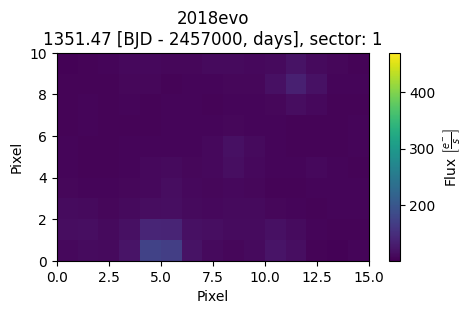

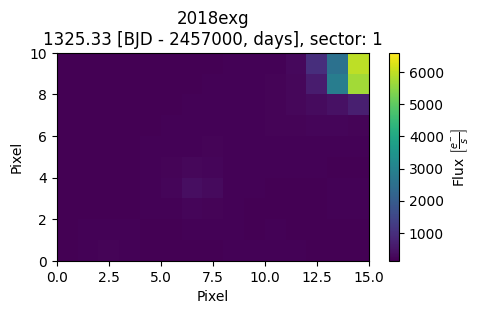

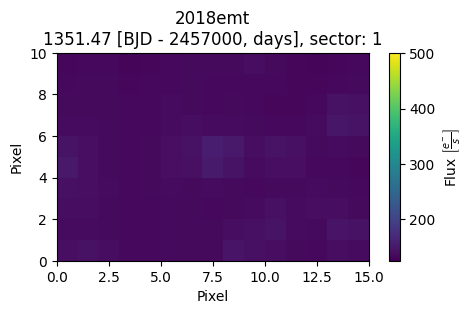

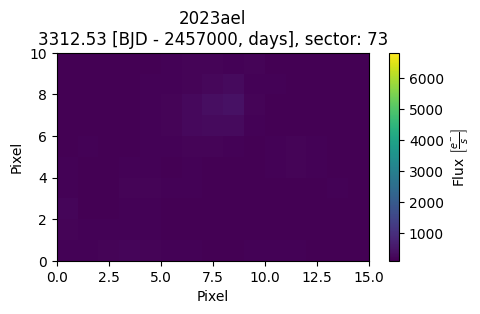

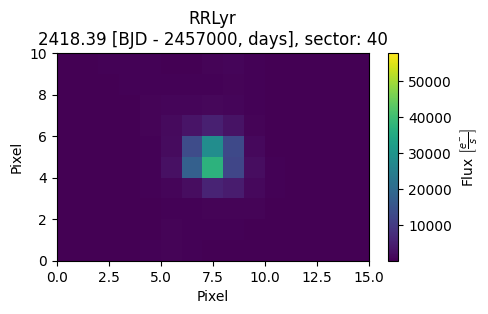

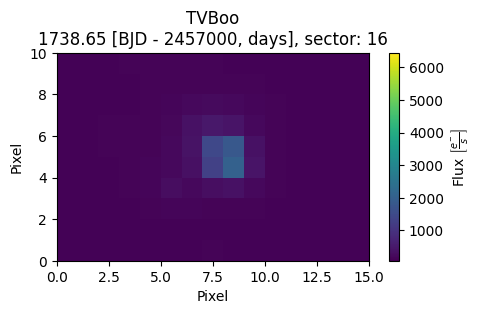

In [49]:
importlib.reload(aldate)

#plot
for idx, hdul in enumerate(hdulists[0:]):
    fig = plt.figure(figsize=(5,3))
    fig, axs, anim = TCI.plot_result(
        hdulist=hdul,
        fig=fig,
        animate=True,
        pcolormesh_kwargs=None,
        sctr_kwargs=None,
        func_animation_kwargs=dict(repeat=False, frames=range(0,len(hdul[1].data)-1,100))
    )
    anim.save(
        f'../_gfx/tesscutinterface_{df_targets["name"][idx]}.gif',
        writer='pillow',
        # savefig_kwargs=dict(bbox_inches='tight')
    )
